<a href="https://colab.research.google.com/github/payal15604/ML_Assignments/blob/main/Assignment_4(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0,
                        6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111,
               67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121871]
}
df = pd.DataFrame(data)

df.to_csv('salary.csv', index=False)

df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Intercept (beta0): 25792.284861217347
Slope (beta1): 9449.940113949055


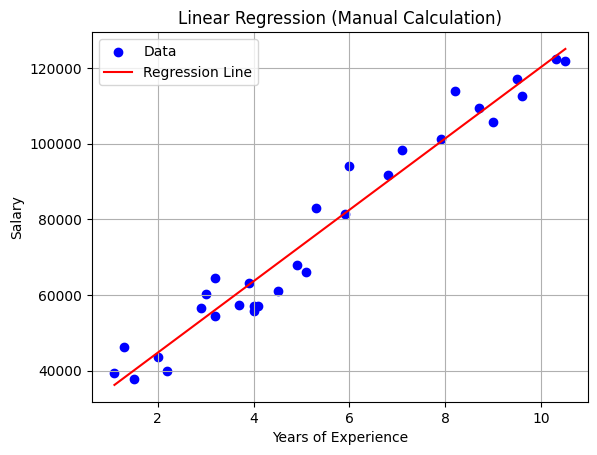

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('salary.csv')

X = data['YearsExperience'].values
y = data['Salary'].values

x_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)
beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

print(f"Intercept (beta0): {beta_0}")
print(f"Slope (beta1): {beta_1}")

X_new = np.linspace(X.min(), X.max(), 100)
y_pred = beta_0 + beta_1 * X_new

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression (Manual Calculation)')
plt.legend()
plt.grid(True)
plt.show()

Intercept (β0): 25792.284861217347
Slope (β1): 9449.940113949055


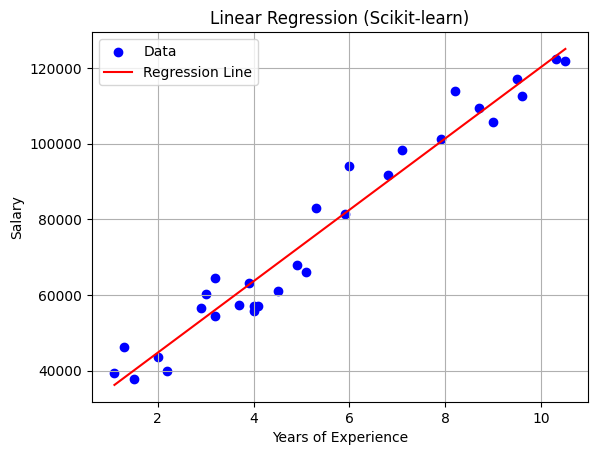

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = pd.read_csv('salary.csv')

required_columns = ['YearsExperience', 'Salary']

X = data[['YearsExperience']].values
y = data['Salary'].values

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Intercept (β0): {beta_0}")
print(f"Slope (β1): {beta_1}")

X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_new)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression (Scikit-learn)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('salary.csv')

required_columns = ['YearsExperience', 'Salary']

X = data[['YearsExperience']].values
y = data['Salary'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ratios = [(90, 10), (80, 20), (70, 30), (60, 40), (50, 50)]

for ratio in ratios:
    train_size, test_size = ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size/100, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Train-Test Split: {train_size}-{test_size}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")
    print()

Train-Test Split: 90-10
Mean Squared Error: 48843874.88
R-squared Score: 0.89

Train-Test Split: 80-20
Mean Squared Error: 49830425.57
R-squared Score: 0.90

Train-Test Split: 70-30
Mean Squared Error: 37785071.11
R-squared Score: 0.94

Train-Test Split: 60-40
Mean Squared Error: 37867607.50
R-squared Score: 0.95

Train-Test Split: 50-50
Mean Squared Error: 43145083.22
R-squared Score: 0.94

